In [30]:
import KNNclassy
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(KNNclassy)

<module 'KNNclassy' from '/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/KNNclassy.py'>

In [46]:
def hist_NS(algo, figname="histNS"):
    plt.rcParams["font.size"]=14

    probs=algo.metrics["probab"]
    pred=1-probs[:,0]
    truelabel=algo.label_test
    index_events_has=(np.where((truelabel == 1) | (truelabel == 2)))
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where(truelabel==0)
    p_events_nohas=pred[index_events_nohas]

    plt.hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No NS')
    plt.hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has NS')
    plt.yscale('log')
    plt.yticks([1e2,1e3,1e4,1e5])
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylim([4.5e1,1.9e5])
    plt.xlabel('P(HasNS)')
    plt.axvline(x=0.5,color='black',ls='--')
    plt.grid(ls='--')
    plt.title(eos)
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)

    plt.show()
    plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    plt.close()
    return

def hist_REM(algo, figname="histREM"):
    probs=algo.metrics["probab"]
    pred=probs[:,2]
    truelabel=algo.label_test
    index_events_has=np.where(truelabel == 2)
    p_events_has=pred[index_events_has]
    index_events_nohas=np.where((truelabel==0) | (truelabel==1))
    p_events_nohas=pred[index_events_nohas]

    plt.hist(p_events_nohas,bins=np.linspace(0,1,20),color='green',alpha=0.5, label='No Remnant')
    plt.hist(p_events_has,bins=np.linspace(0,1,20),color=(0.1, 0.2, 0.5, 0.),edgecolor='black', hatch="/",label='Has Remnant')
    plt.yscale('log')
    plt.yticks([1e2,1e3,1e4,1e5])
    plt.xticks([0,0.2,0.4,0.6,0.8,1])
    plt.ylim([4.5e1,1.9e5])
    plt.xlabel('P(HasRemnant)')
    plt.axvline(x=0.5,color='black',ls='--')
    plt.title(eos)
    plt.grid(ls='--')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0]
    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,loc=1)
    
    plt.show()
    plt.savefig(figname+".png",dpi=200,bbox_inches='tight')
    plt.close()
    return

def ROC_NS(algo, thr_wanted = [], figname="ROC_NS"):
    allprob = algo.metrics["probab"]
    v_prob_NS = 1-allprob[:,0]
    events_have_NS = np.where((algo.label_test==1) | (algo.label_test==2))[0]
    N = len(events_have_NS)
    M = len(algo.label_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_NS>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_NS:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        if (len(thr_wanted)>0 and (thr in thr_wanted)):
            print("Threshold ",thr, "TP: {:.3f}, FP {:.3f}".format(TP[i], FP[i]))
        i = i + 1

    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.title(eos)
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    plt.show()
    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    plt.close()
    return np.asarray(FP), np.asarray(TP), threshold

def ROC_REM(algo, thr_wanted = [], figname="ROC_REM"):
    allprob = algo.metrics["probab"]
    v_prob_REM = allprob[:,2]
    events_have_REM = np.where(algo.label_test==2)[0]
    N = len(events_have_REM)
    M = len(algo.label_test) - N
    threshold = np.linspace(0,1,101)[1:-1]
    TP = np.zeros(99)
    FP = np.zeros(99)
    i=0
    for thr in threshold:
        index_say_yes = np.where(v_prob_REM>=thr)[0]
        count_yes = 0.0; count_no = 0.0
        for index in index_say_yes:
            if index in events_have_REM:
                count_yes=count_yes + 1.0
            else:
                count_no=count_no + 1.0
        TP[i] = count_yes/N
        FP[i] = count_no/M
        if (len(thr_wanted)>0 and (thr in thr_wanted)):
            print("Threshold ",thr, "TP: {:.3f}, FP {:.3f}".format(TP[i], FP[i]))
        i = i + 1

    plt.figure()
    sc=plt.scatter(FP, TP, c=threshold, cmap='viridis')
    plt.colorbar(sc, label="Threshold")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.title(eos)
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    plt.show()
    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    plt.close()
    return np.asarray(FP), np.asarray(TP), threshold

def ROC_NS_all_EOS(EOS,figname = "ROC_NS_all_EOS"):

    plt.figure()

    for eos in EOS:
        KNN = KNNclassy.ClassificationKNN()
        KNN.load_original_dataset(pathData,eos+"/EMB/original_data_"+eos+"_s300_f0d7.csv")
        KNN.loadModel("models_eos/", "knn_3cat_eos_"+eos)
        KNN.compute_metrics()

        allprob = KNN.metrics["probab"]
        v_prob_NS = 1-allprob[:,0]
        events_have_NS = np.where((KNN.label_test==1) | (KNN.label_test==2))[0]
        N = len(events_have_NS)
        M = len(KNN.label_test) - N
        threshold = np.linspace(0,1,101)[1:-1]
        TP = np.zeros(99)
        FP = np.zeros(99)
        i=0
        for thr in threshold:
            index_say_yes = np.where(v_prob_NS>=thr)[0]
            count_yes = 0.0; count_no = 0.0
            for index in index_say_yes:
                if index in events_have_NS:
                    count_yes=count_yes + 1.0
                else:
                    count_no=count_no + 1.0
            TP[i] = count_yes/N
            FP[i] = count_no/M
            i = i + 1

        plt.plot(FP,TP,linewidth= 0.5,linestyle = 'solid', label = eos)

    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    plt.legend(bbox_to_anchor =(1.45,1.5))
    plt.show()
    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    plt.close()
    return

def ROC_REM_all_EOS(EOS,figname = "ROC_REM_all_EOS"):

    plt.figure()

    for eos in EOS:
        KNN = KNNclassy.ClassificationKNN()
        KNN.load_original_dataset(pathData,eos+"/EMB/original_data_"+eos+"_s300_f0d7.csv")
        KNN.loadModel("models_eos/", "knn_3cat_eos_"+eos)
        KNN.compute_metrics()

        allprob = KNN.metrics["probab"]
        v_prob_REM = allprob[:,2]
        events_have_REM = np.where(KNN.label_test==2)[0]
        N = len(events_have_REM)
        M = len(KNN.label_test) - N
        threshold = np.linspace(0,1,101)[1:-1]
        TP = np.zeros(99)
        FP = np.zeros(99)
        i=0
        for thr in threshold:
            index_say_yes = np.where(v_prob_REM>=thr)[0]
            count_yes = 0.0; count_no = 0.0
            for index in index_say_yes:
                if index in events_have_REM:
                    count_yes=count_yes + 1.0
                else:
                    count_no=count_no + 1.0
            TP[i] = count_yes/N
            FP[i] = count_no/M

            i = i + 1

        plt.plot(FP,TP,linewidth= 0.5,linestyle = 'solid', label = eos)

    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.grid(ls='--')
    plt.ylim([0.82,1.02])
    plt.xlim([0,0.2])
    plt.yticks(np.linspace(0.825,1,8))
    plt.legend(bbox_to_anchor =(1.45,1.5))

    plt.show()
    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    plt.close()
    return


In [37]:
pathClassy = "/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/"
pathData = "/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/input/"
EOS = ["APR4_EPP", "BHF_BBB2", "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1_PP", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLy", "SLY2", "SLY9", "SLY230A"]
EOSgrey = ["APR4_EPP",  "H4", "HQC18", "KDE0V", "KDE0V1", "MPA1", "MS1B_PP", "RS", "SK255", "SK272", "SKI2", "SKI3", "SKI4", "SKI5", "SKI6", "SKMP", "SKOP", "SLY2", "SLY9", "SLY230A"]
EOScolor = ["BHF_BBB2", "MS1_PP", "SLy"]
BayesFactor = [1.526, 1.555, 0.056, 1.422, 1.177, 1.283, 0.276, 0.001, 0.009, 0.176, 0.179, 0.159, 0.108, 0.107, 0.33, 0.025, 0.288, 0.29, 0.618, 1.0, 1.028, 0.37, 0.932]

In [38]:
EOSdic = {}
count = 0

Doing APR4_EPP
File shape :  (198961, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198961
Nº of events for training:  139273
Nº of events for testing:  59688
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_APR4_EPP.joblib
Model score :  0.9530558906312827
Predicting probabilities...
Testing time (s) :  1.8996191527694464


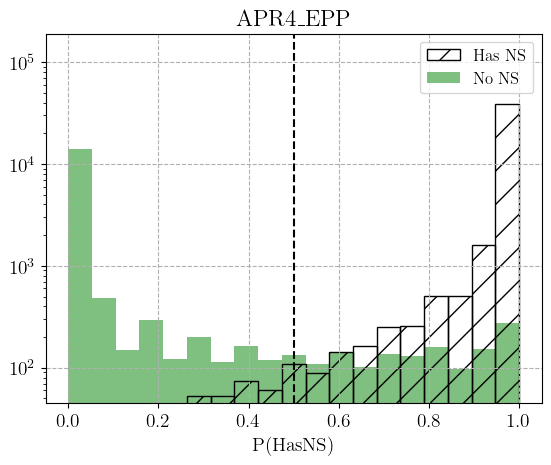

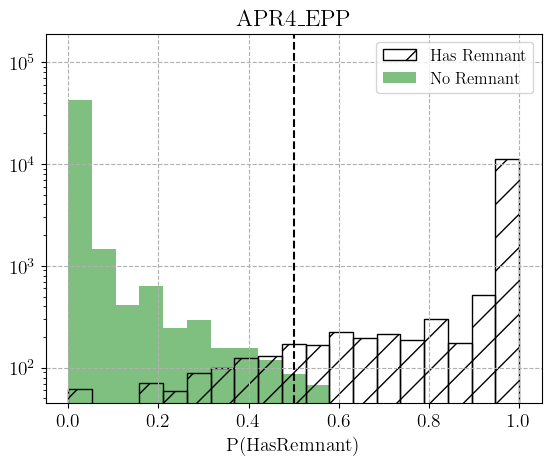

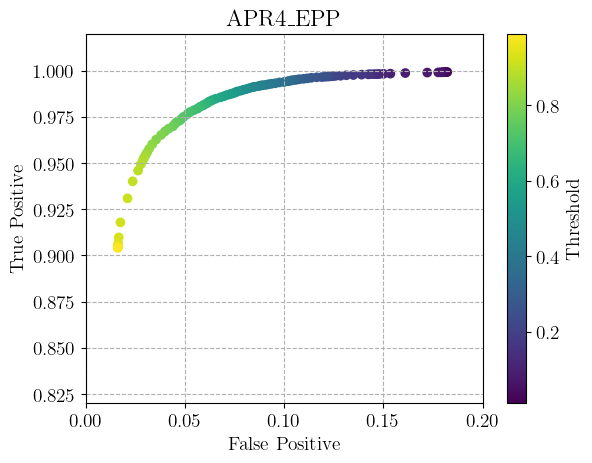

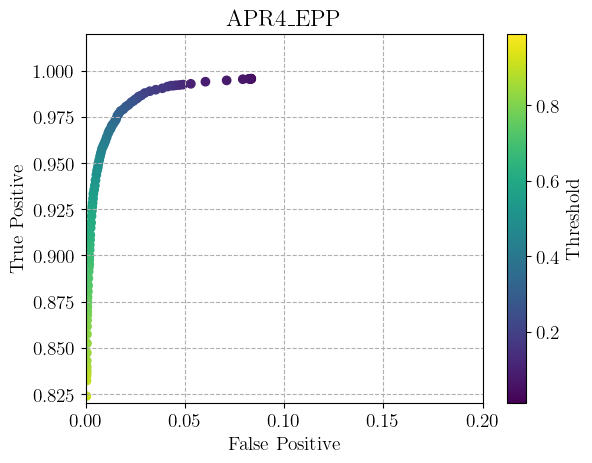

############################################################
Doing BHF_BBB2
File shape :  (193624, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  193624
Nº of events for training:  135537
Nº of events for testing:  58087
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_BHF_BBB2.joblib
Model score :  0.9511766832509856
Predicting probabilities...
Testing time (s) :  3.118416177108884


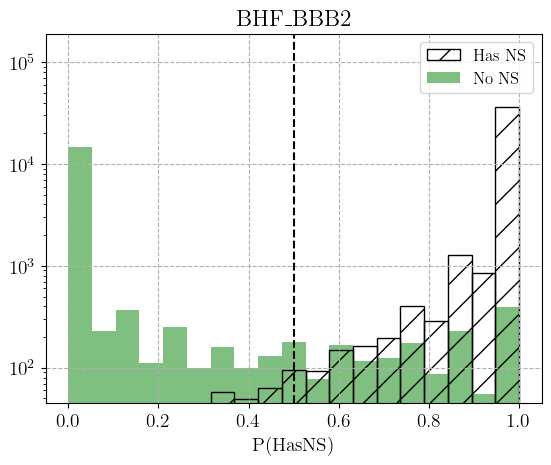

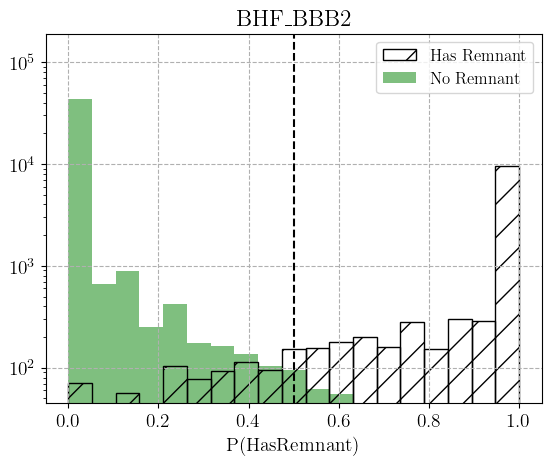

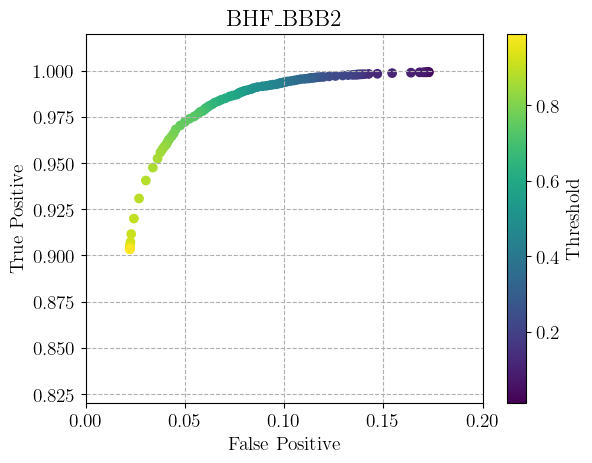

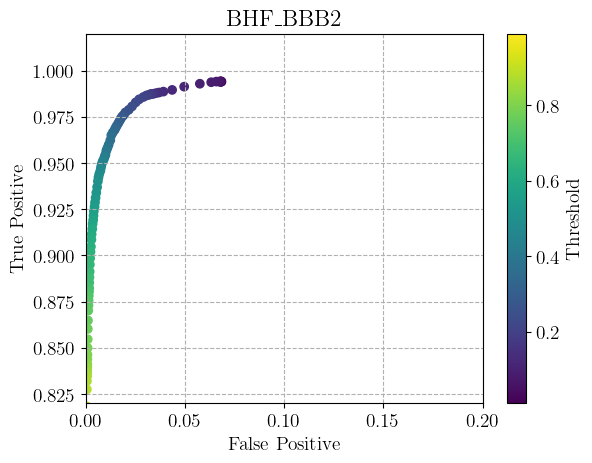

############################################################
Doing H4
File shape :  (195764, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  195764
Nº of events for training:  137035
Nº of events for testing:  58729
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_H4.joblib
Model score :  0.9410512693899096
Predicting probabilities...
Testing time (s) :  3.9961500531062484


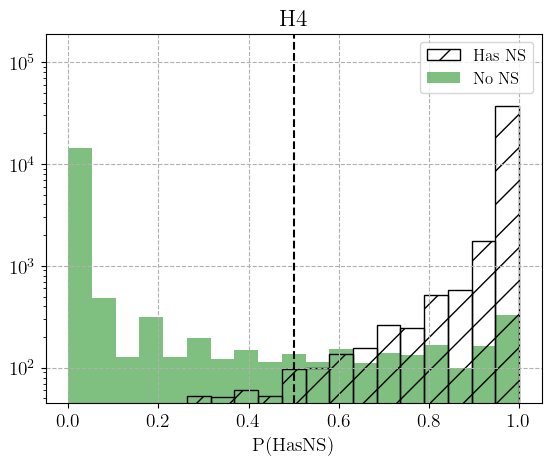

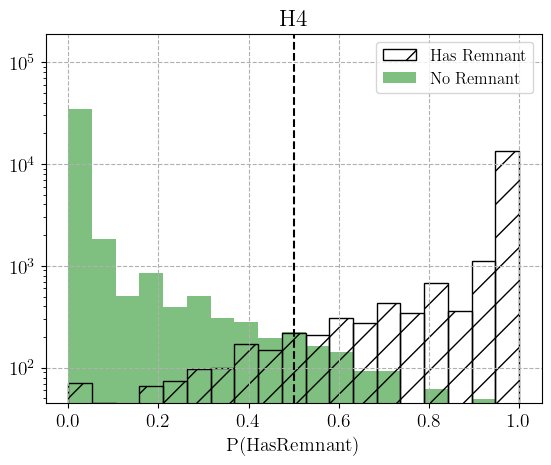

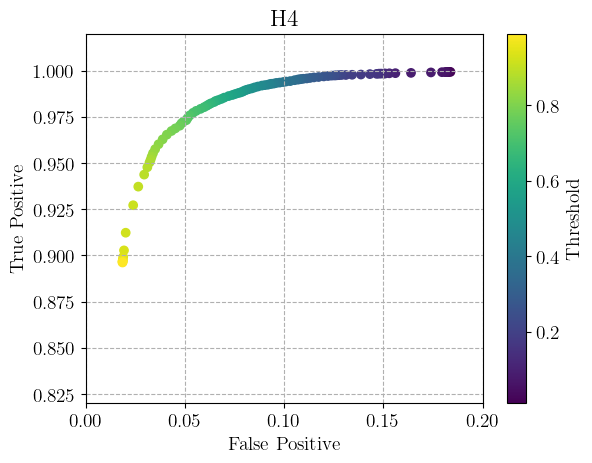

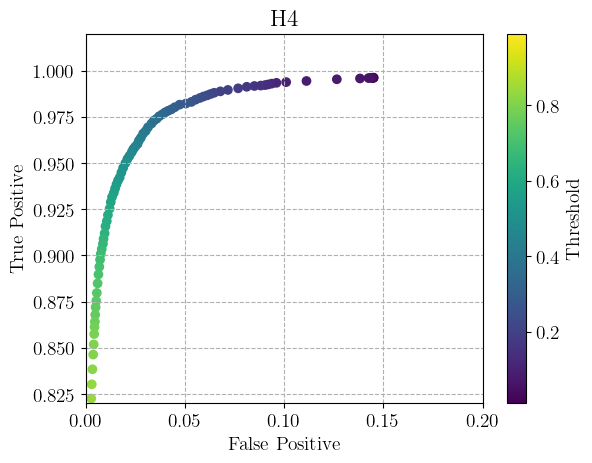

############################################################
Doing HQC18
File shape :  (196070, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196070
Nº of events for training:  137249
Nº of events for testing:  58821
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_HQC18.joblib
Model score :  0.9503578653882117
Predicting probabilities...
Testing time (s) :  3.1833504335954785


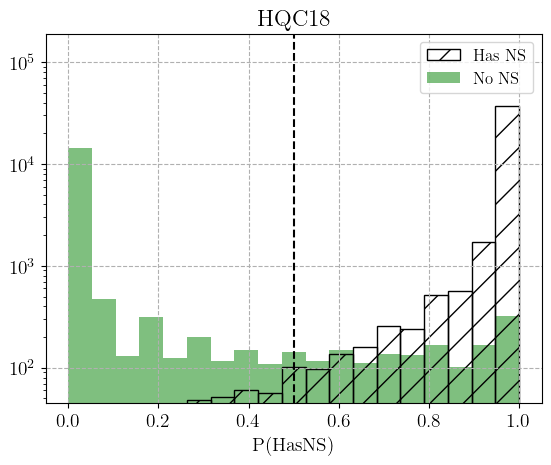

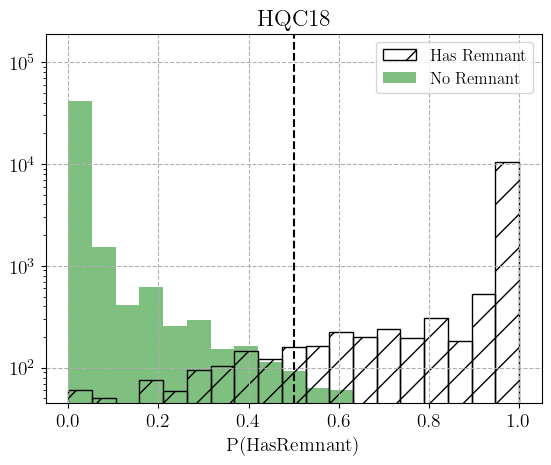

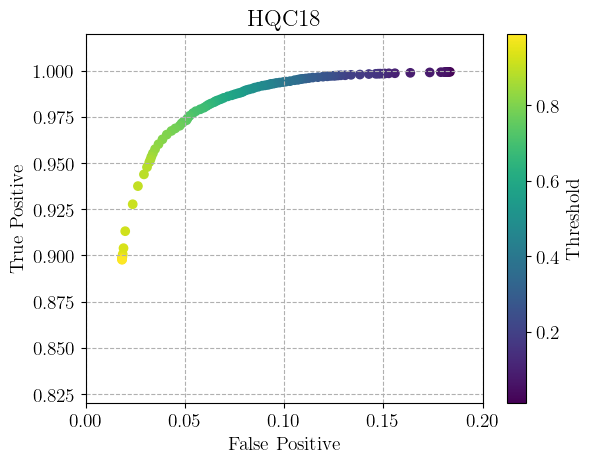

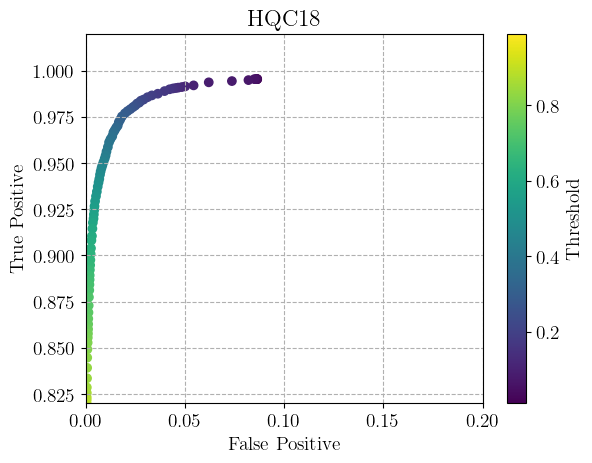

############################################################
Doing KDE0V
File shape :  (194264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  194264
Nº of events for training:  135985
Nº of events for testing:  58279
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_KDE0V.joblib
Model score :  0.9505997014361949
Predicting probabilities...
Testing time (s) :  3.6058967420831323


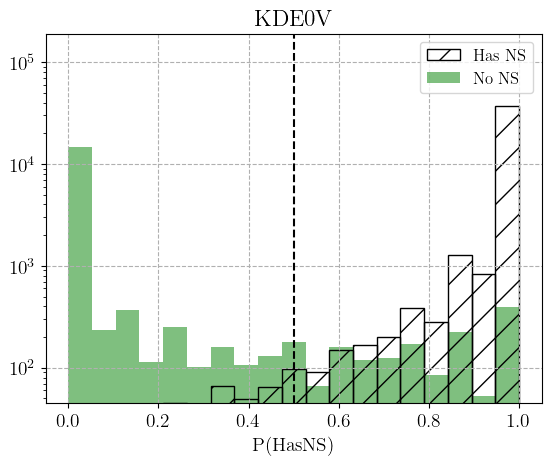

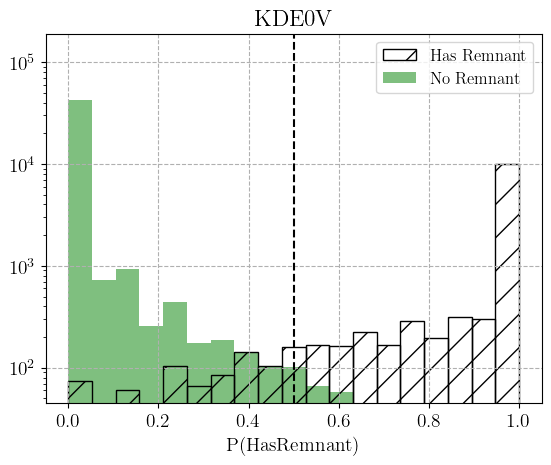

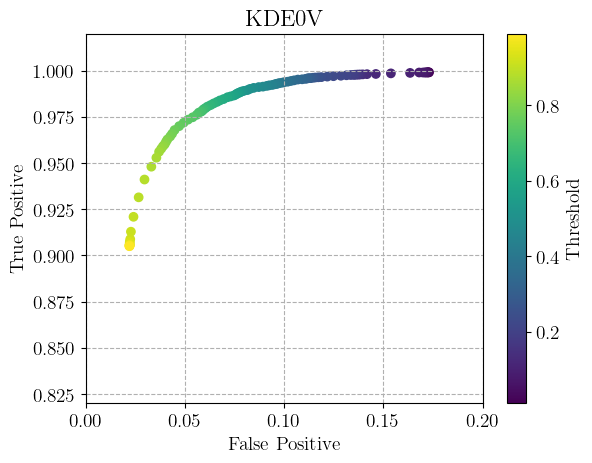

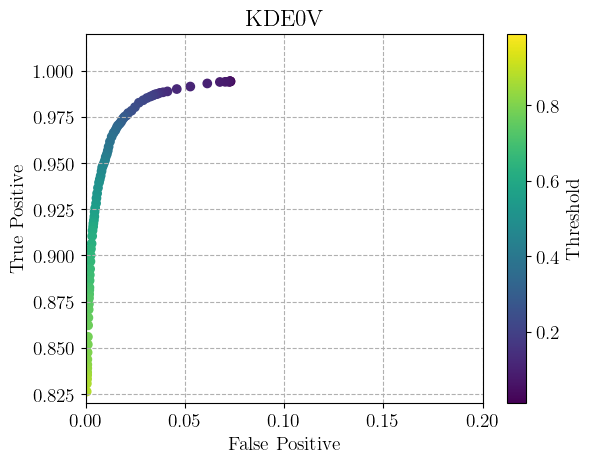

############################################################
Doing KDE0V1
File shape :  (194434, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  194434
Nº of events for training:  136104
Nº of events for testing:  58330
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_KDE0V1.joblib
Model score :  0.9494599691410938
Predicting probabilities...
Testing time (s) :  3.580063465051353


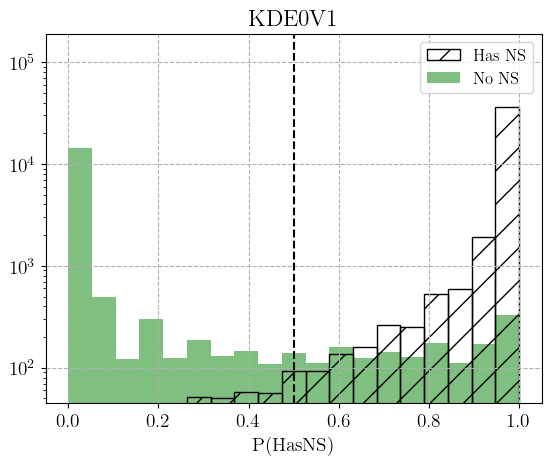

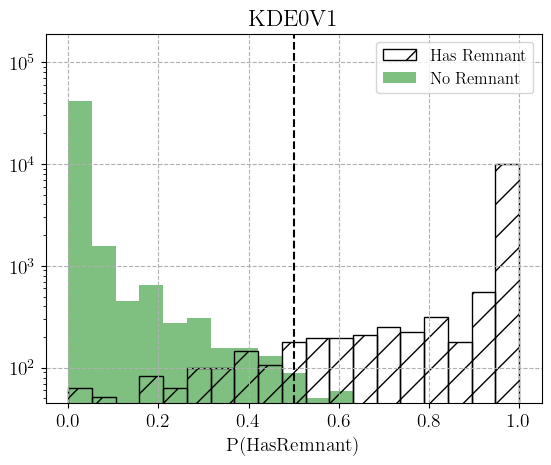

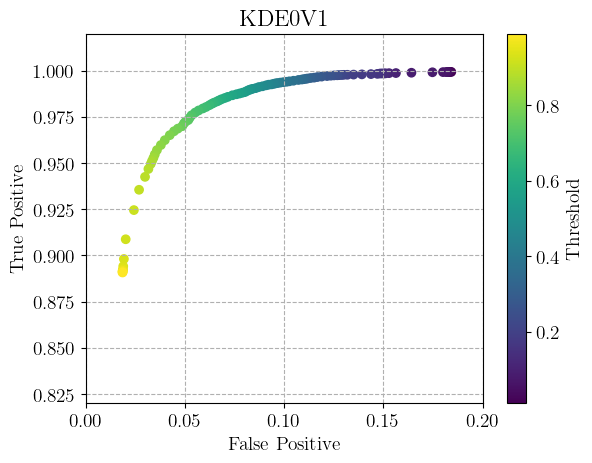

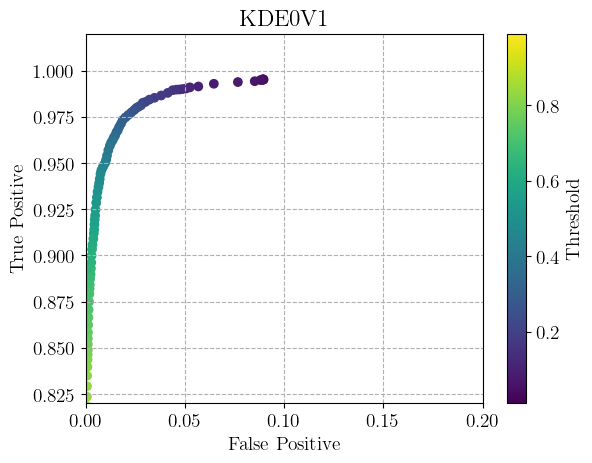

############################################################
Doing MPA1
File shape :  (203407, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  203407
Nº of events for training:  142385
Nº of events for testing:  61022
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_MPA1.joblib
Model score :  0.9510340532922552
Predicting probabilities...
Testing time (s) :  4.268070838414133


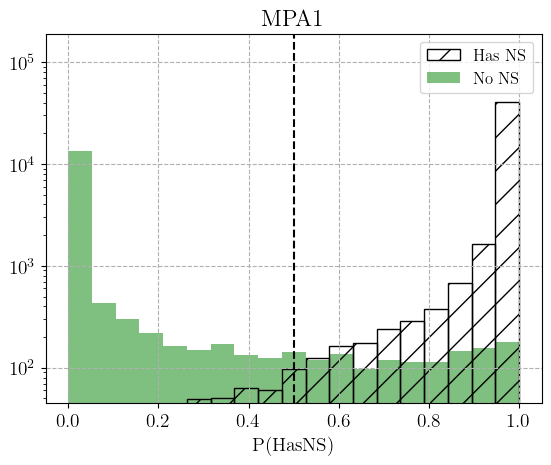

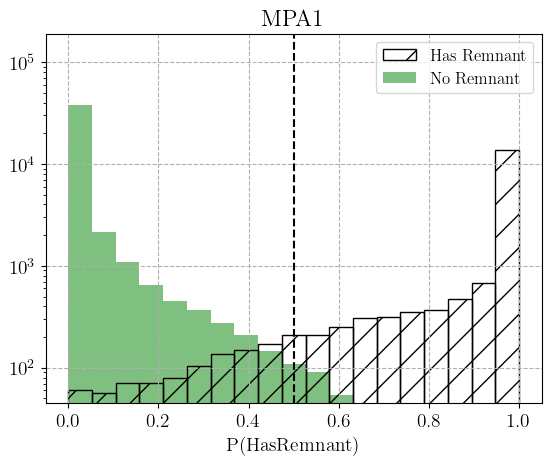

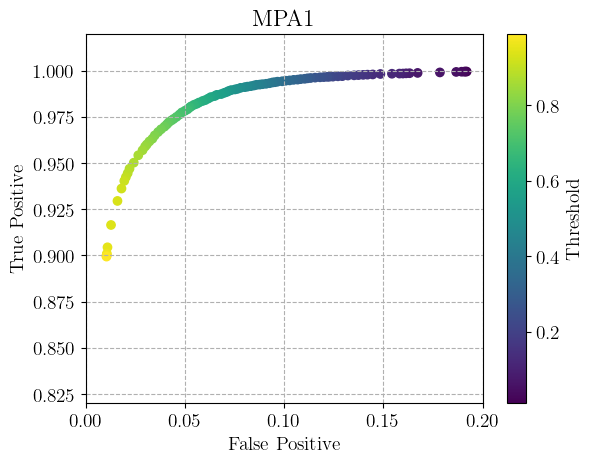

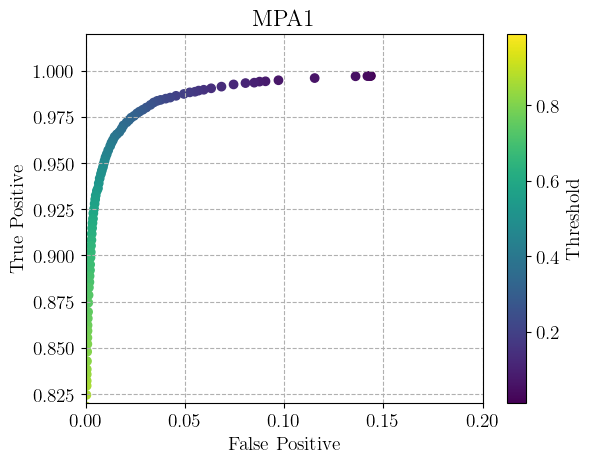

############################################################
Doing MS1_PP
File shape :  (203407, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  203407
Nº of events for training:  142385
Nº of events for testing:  61022
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_MS1_PP.joblib
Model score :  0.948149847595949
Predicting probabilities...
Testing time (s) :  3.874148010276258


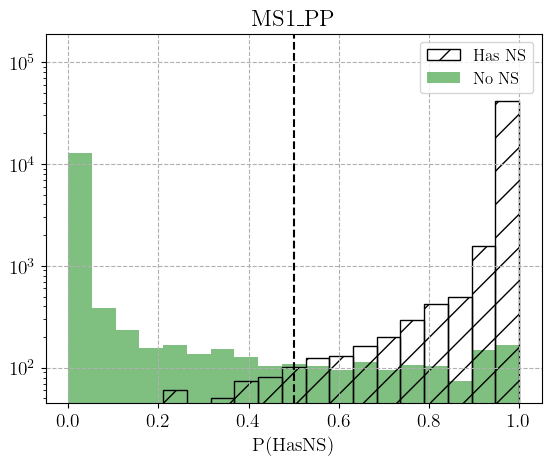

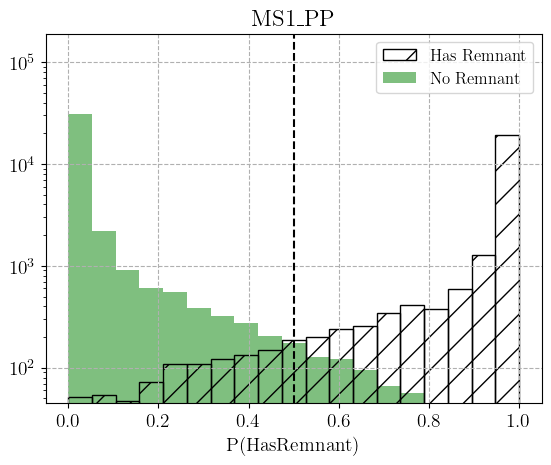

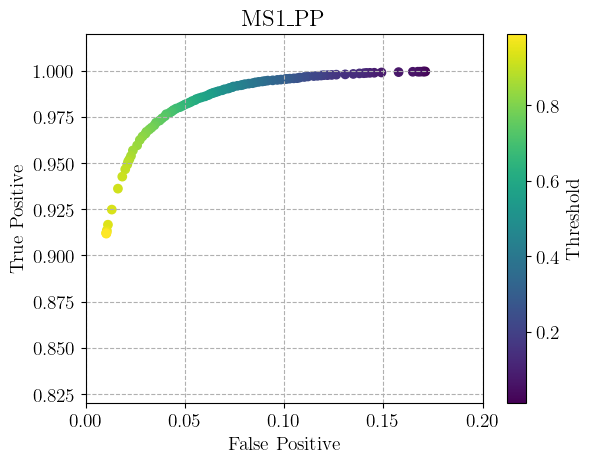

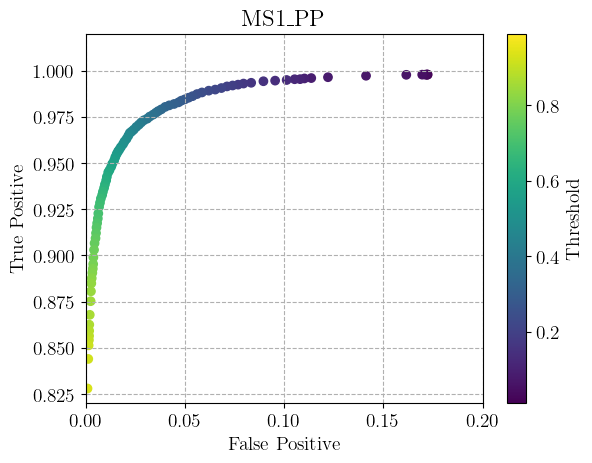

############################################################
Doing MS1B_PP
File shape :  (203407, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  203407
Nº of events for training:  142385
Nº of events for testing:  61022
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_MS1B_PP.joblib
Model score :  0.9473960211071417
Predicting probabilities...
Testing time (s) :  4.132020676508546


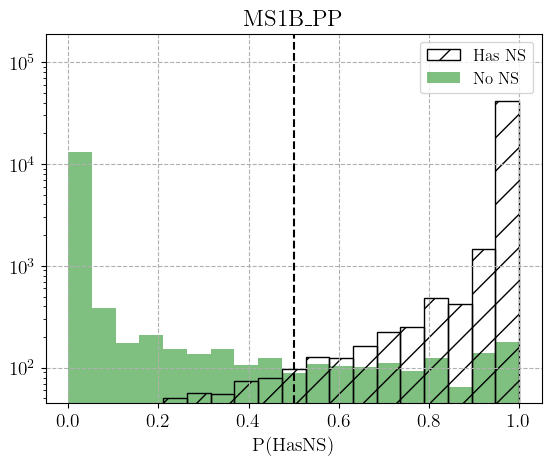

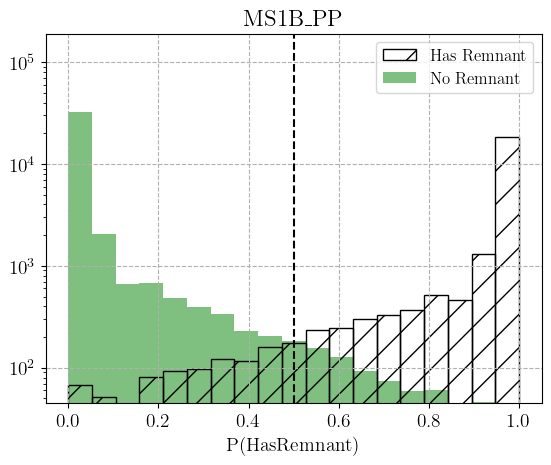

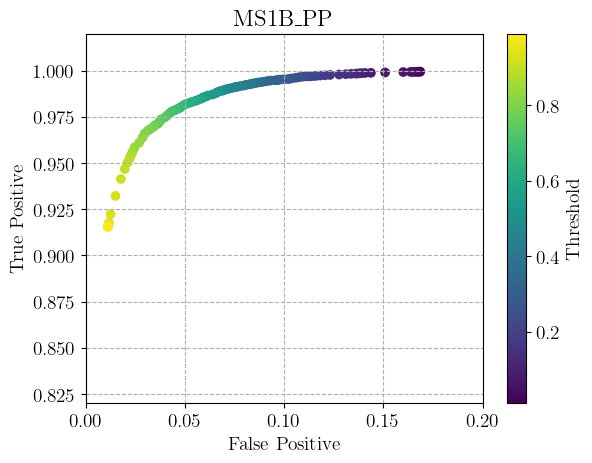

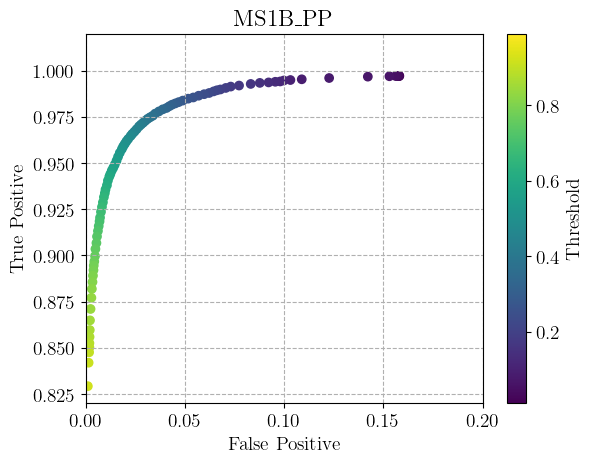

############################################################
Doing RS
File shape :  (197789, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  197789
Nº of events for training:  138453
Nº of events for testing:  59336
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_RS.joblib
Model score :  0.9458001887555616
Predicting probabilities...
Testing time (s) :  3.6730738012120128


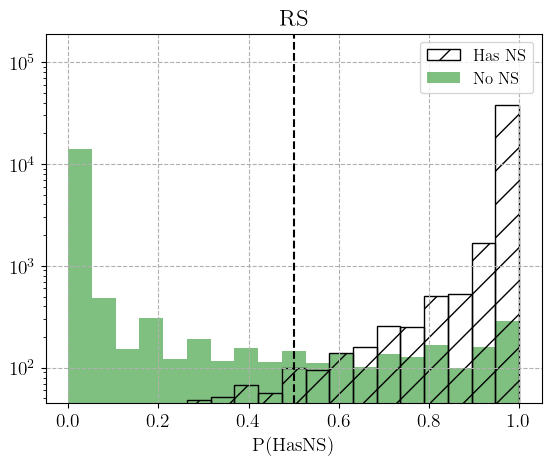

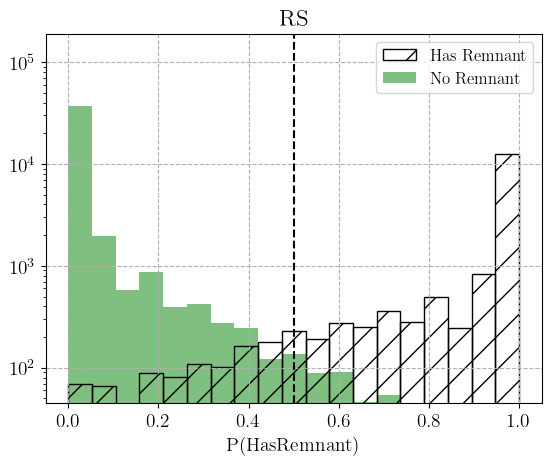

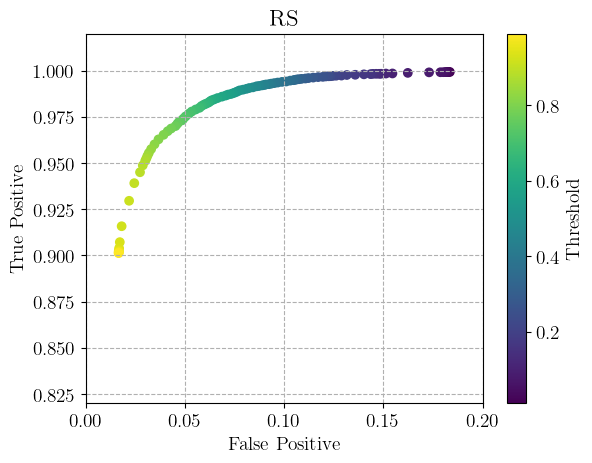

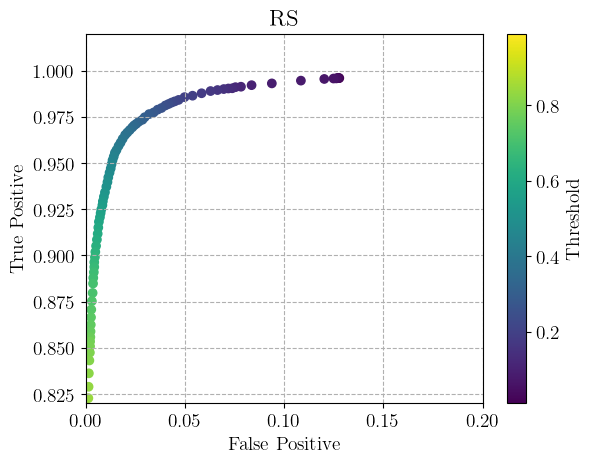

############################################################
Doing SK255
File shape :  (198532, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198532
Nº of events for training:  138973
Nº of events for testing:  59559
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SK255.joblib
Model score :  0.9460031229537098
Predicting probabilities...
Testing time (s) :  3.7152951871976256


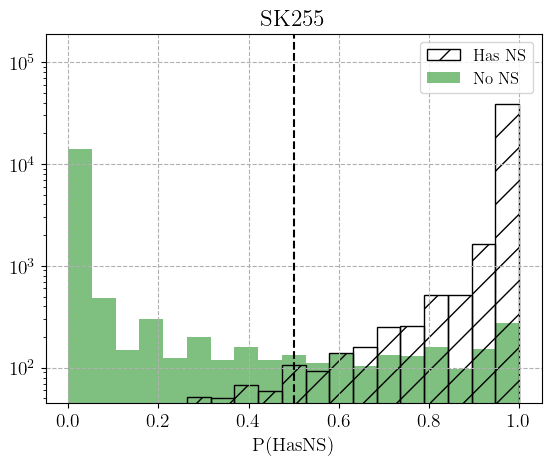

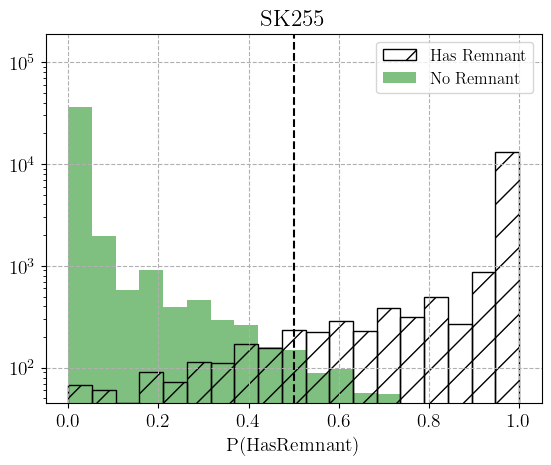

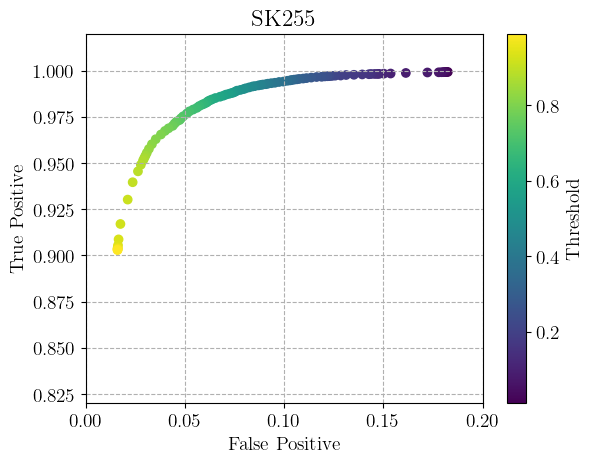

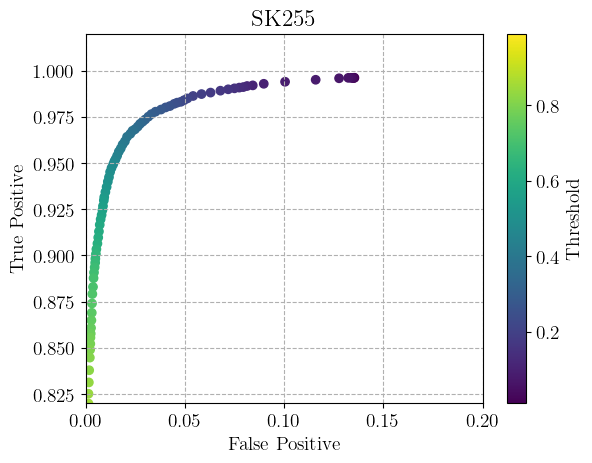

############################################################
Doing SK272
File shape :  (201120, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  201120
Nº of events for training:  140784
Nº of events for testing:  60336
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SK272.joblib
Model score :  0.9454885971890745
Predicting probabilities...
Testing time (s) :  3.5983354281634092


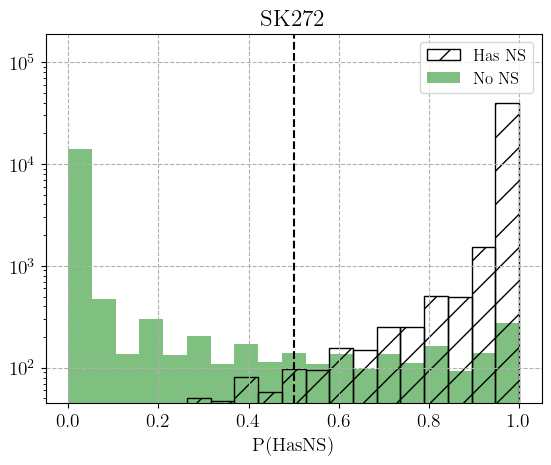

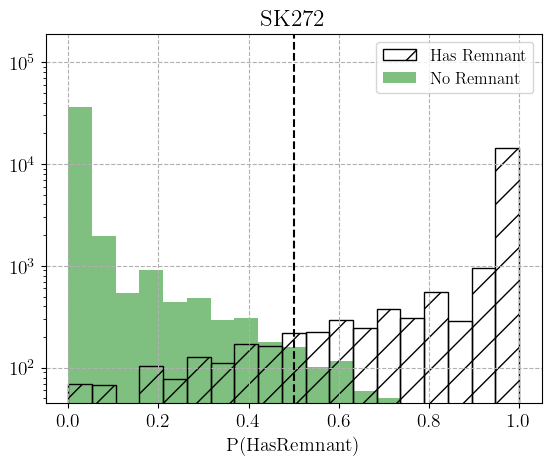

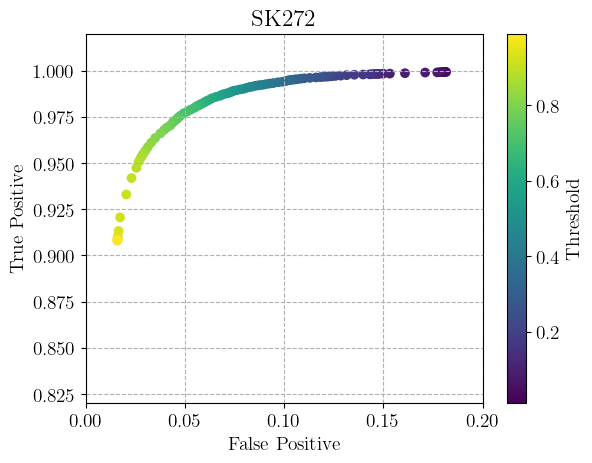

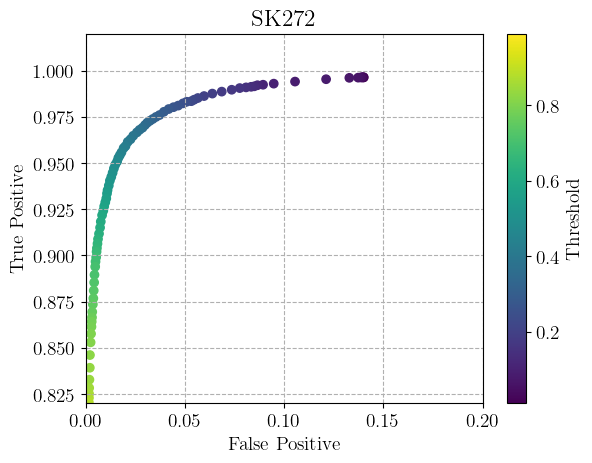

############################################################
Doing SKI2
File shape :  (199062, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  199062
Nº of events for training:  139344
Nº of events for testing:  59718
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SKI2.joblib
Model score :  0.9426638534445226
Predicting probabilities...
Testing time (s) :  3.8132354924455285


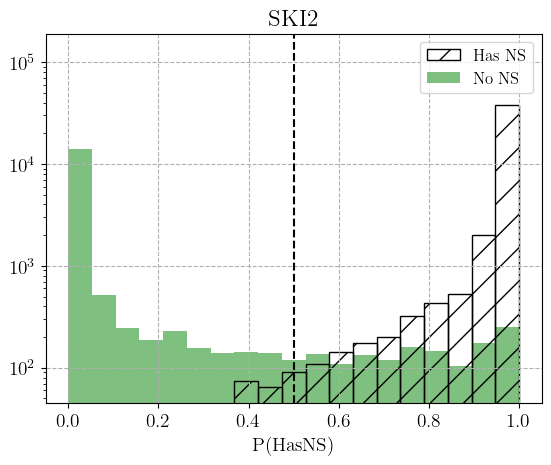

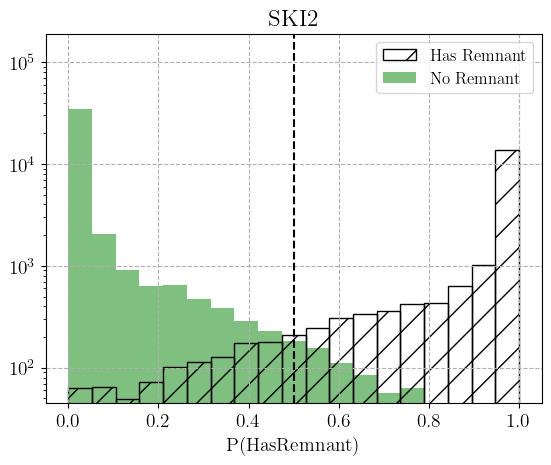

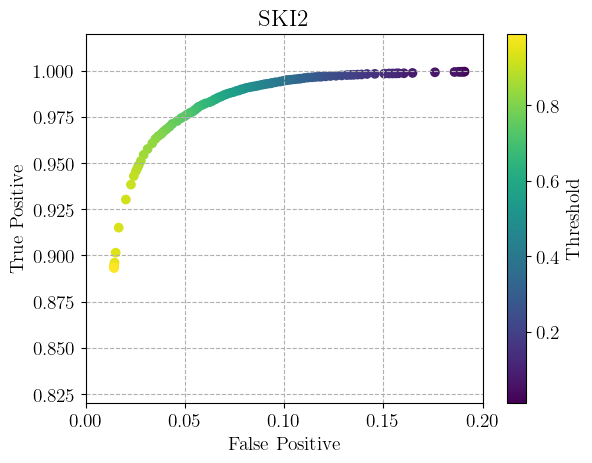

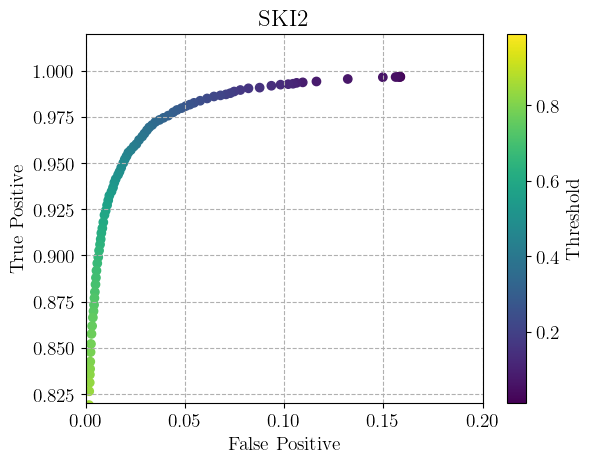

############################################################
Doing SKI3
File shape :  (201373, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  201373
Nº of events for training:  140962
Nº of events for testing:  60411
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SKI3.joblib
Model score :  0.943536773104236
Predicting probabilities...
Testing time (s) :  4.054259914904833


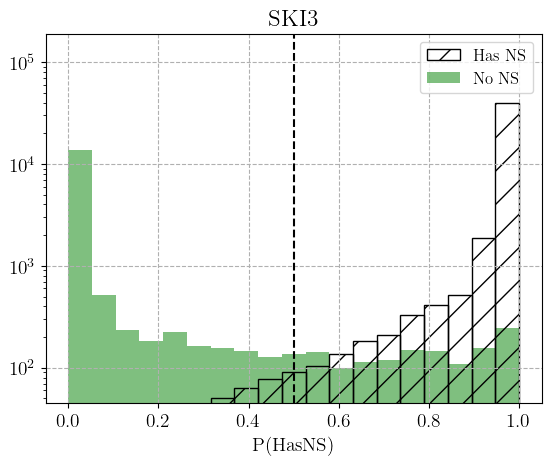

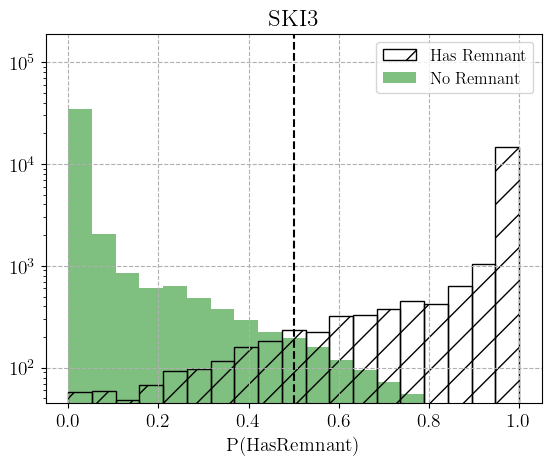

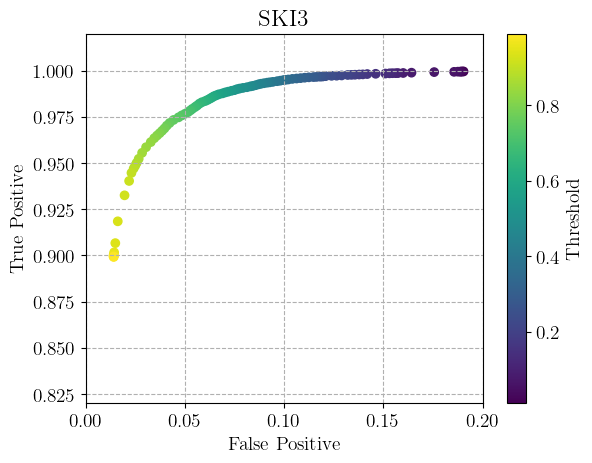

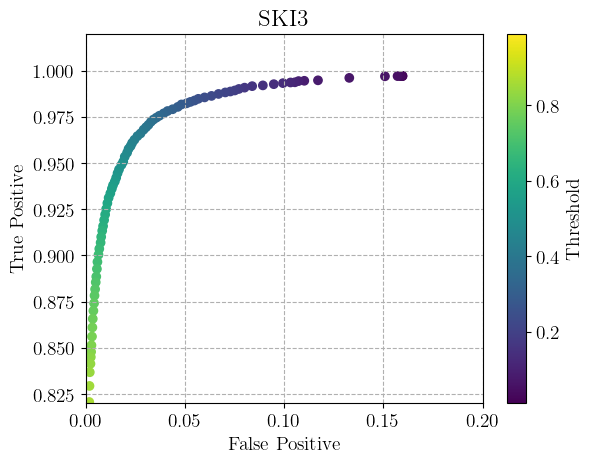

############################################################
Doing SKI4
File shape :  (199255, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  199255
Nº of events for training:  139479
Nº of events for testing:  59776
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SKI4.joblib
Model score :  0.9493609475374732
Predicting probabilities...
Testing time (s) :  3.9639137210324407


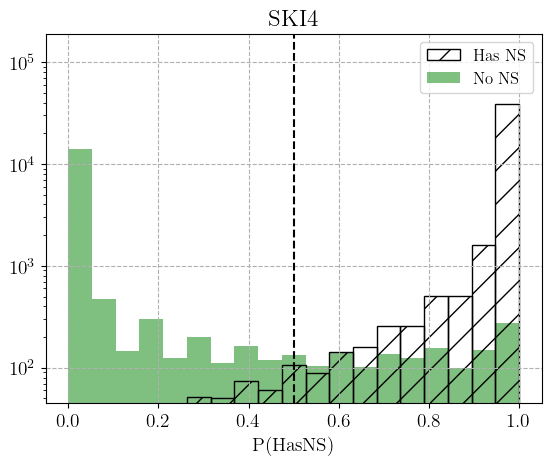

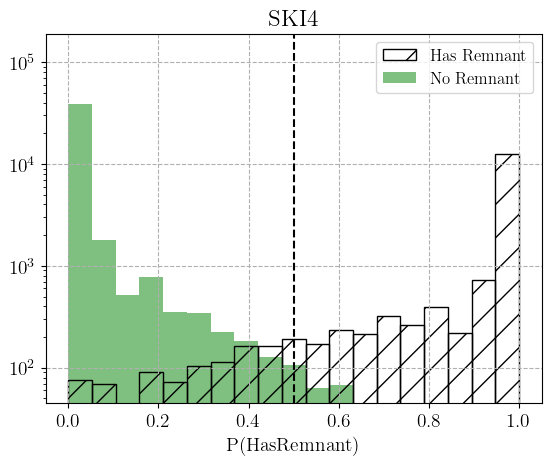

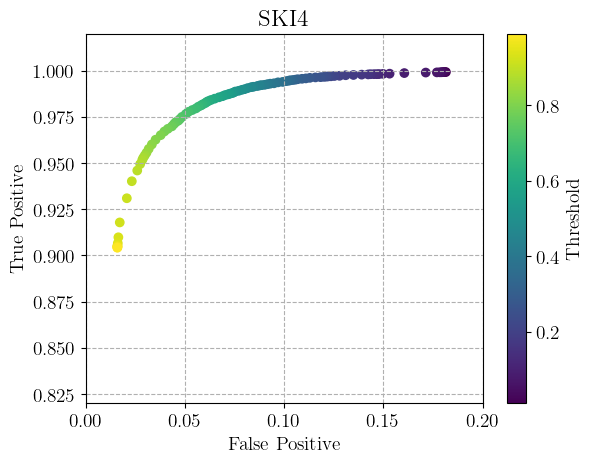

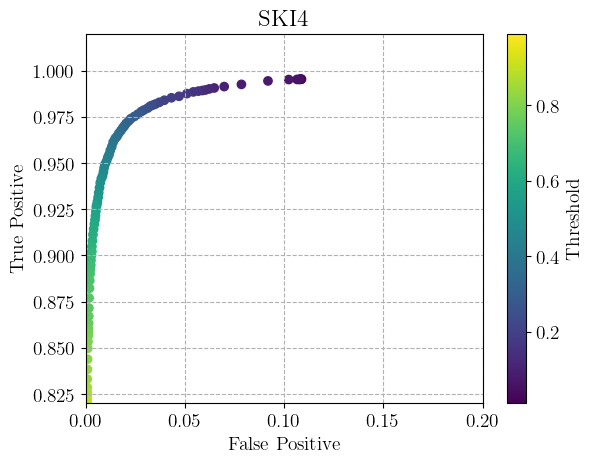

############################################################
Doing SKI5
File shape :  (201373, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  201373
Nº of events for training:  140962
Nº of events for testing:  60411
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SKI5.joblib
Model score :  0.9450100147324163
Predicting probabilities...
Testing time (s) :  3.9170166198164225


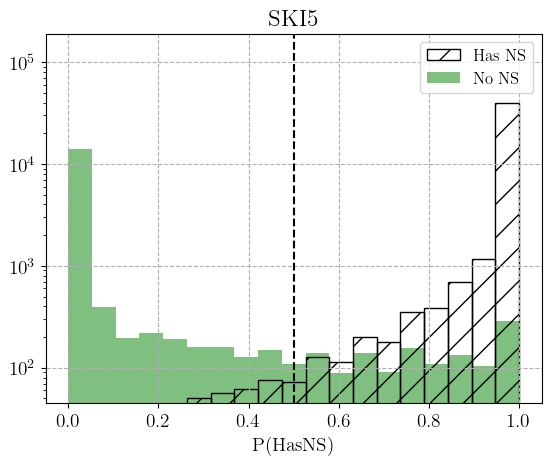

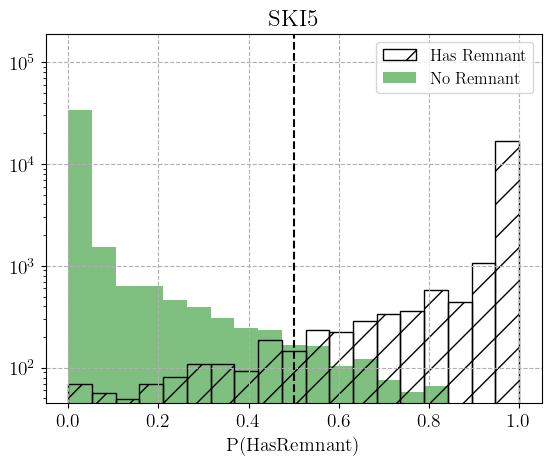

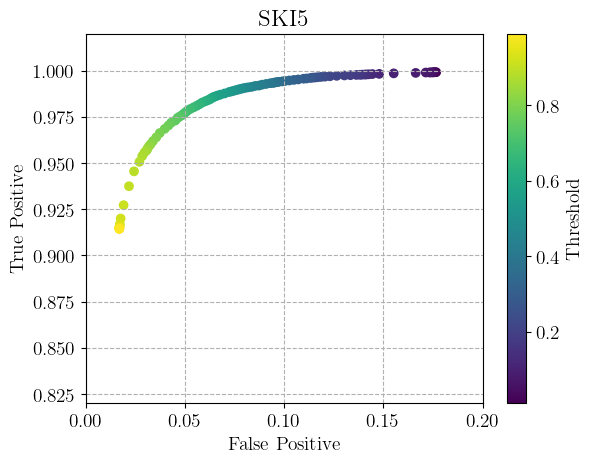

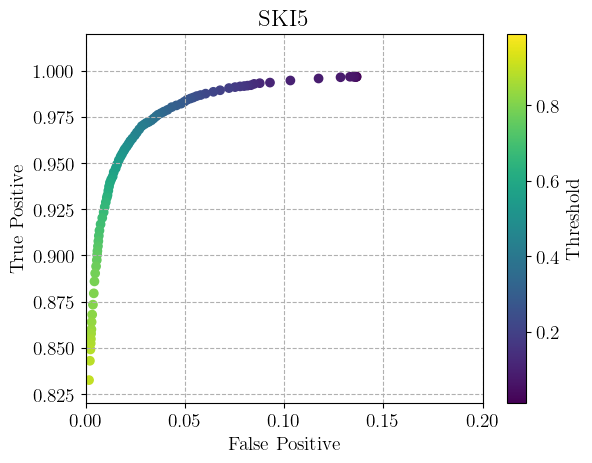

############################################################
Doing SKI6
File shape :  (199821, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  199821
Nº of events for training:  139875
Nº of events for testing:  59946
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SKI6.joblib
Model score :  0.9492209655356487
Predicting probabilities...
Testing time (s) :  3.899752360768616


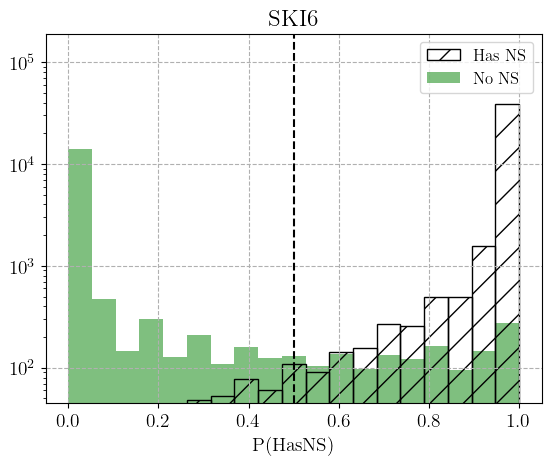

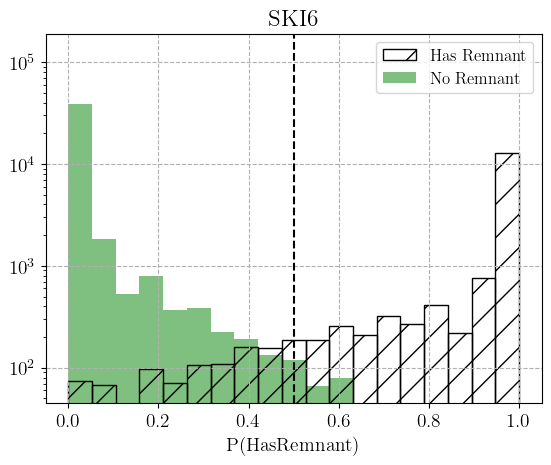

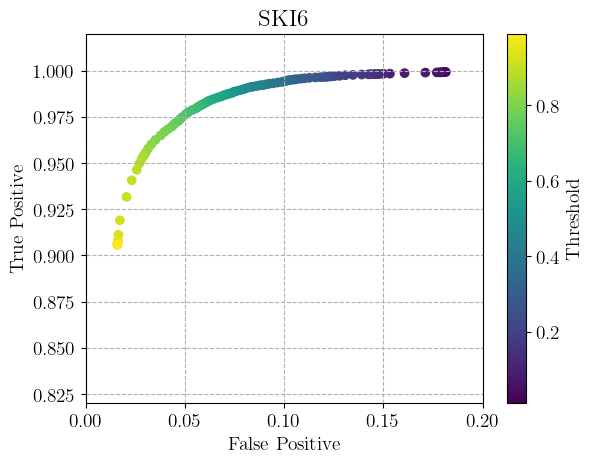

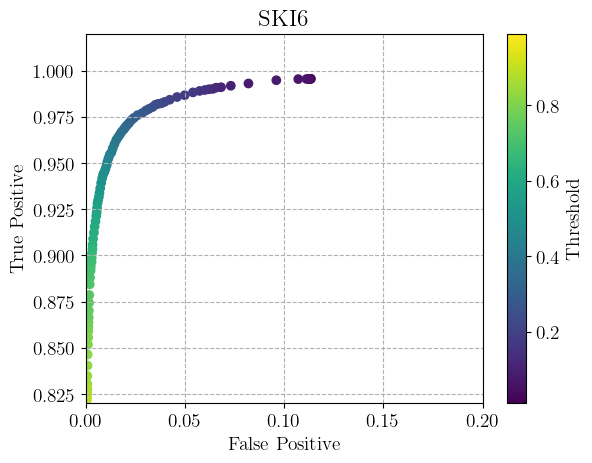

############################################################
Doing SKMP
File shape :  (197566, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  197566
Nº of events for training:  138297
Nº of events for testing:  59269
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SKMP.joblib
Model score :  0.9477298419072365
Predicting probabilities...
Testing time (s) :  3.4743204740807414


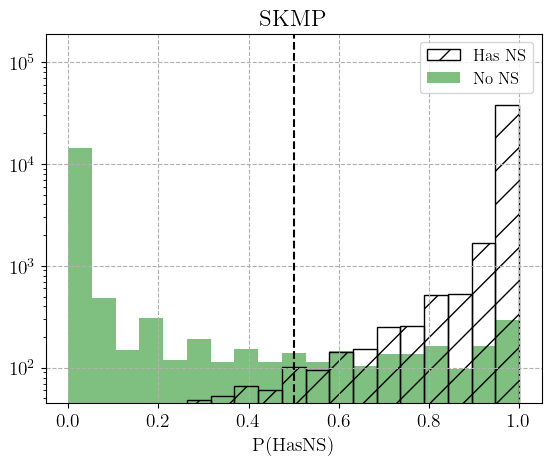

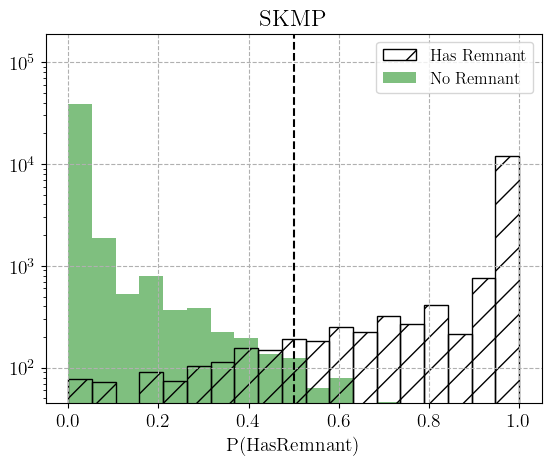

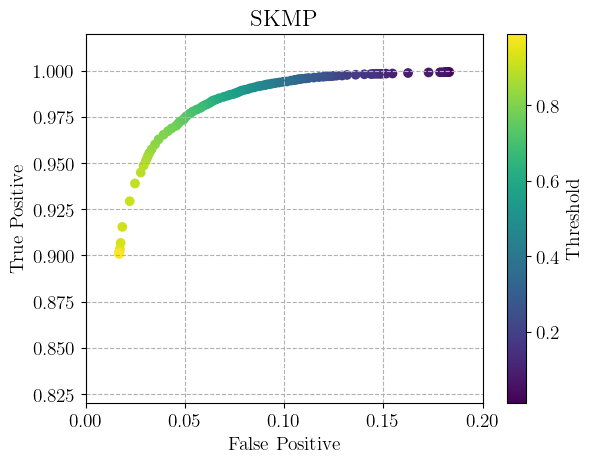

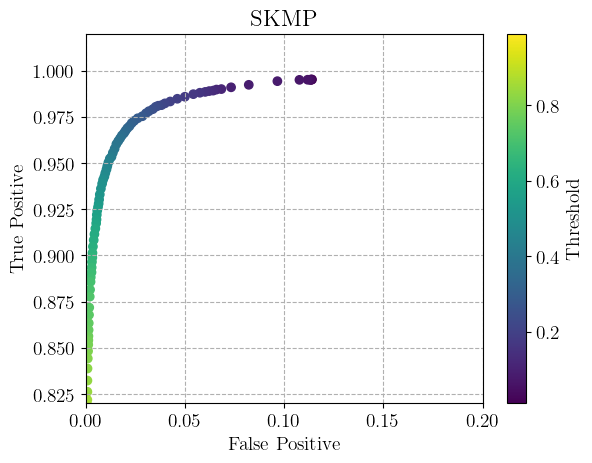

############################################################
Doing SKOP
File shape :  (194522, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  194522
Nº of events for training:  136166
Nº of events for testing:  58356
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SKOP.joblib
Model score :  0.948128727123175
Predicting probabilities...
Testing time (s) :  3.4217024324461818


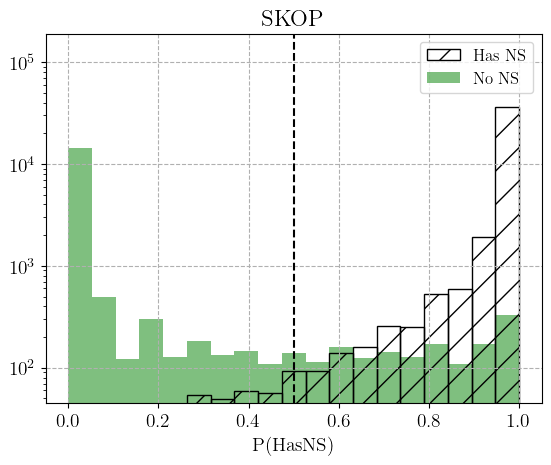

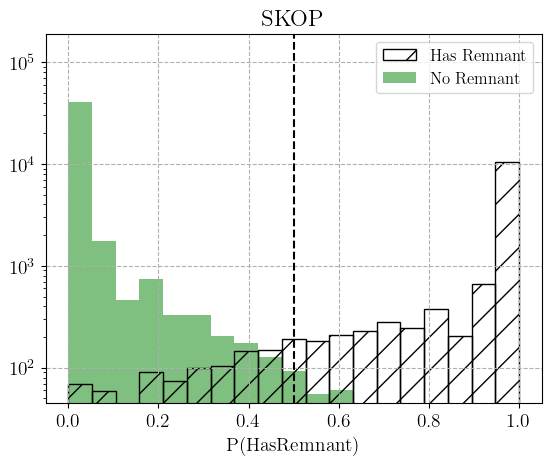

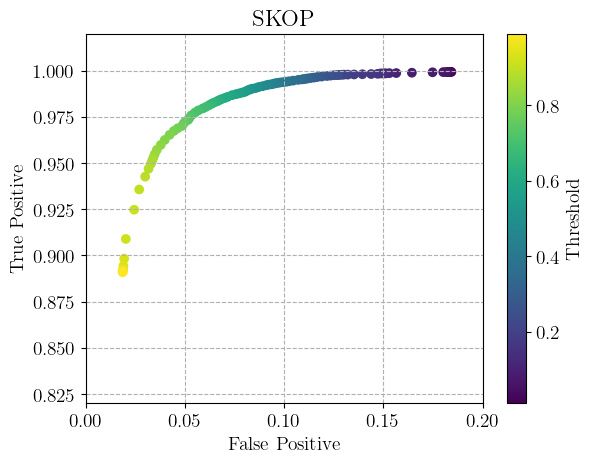

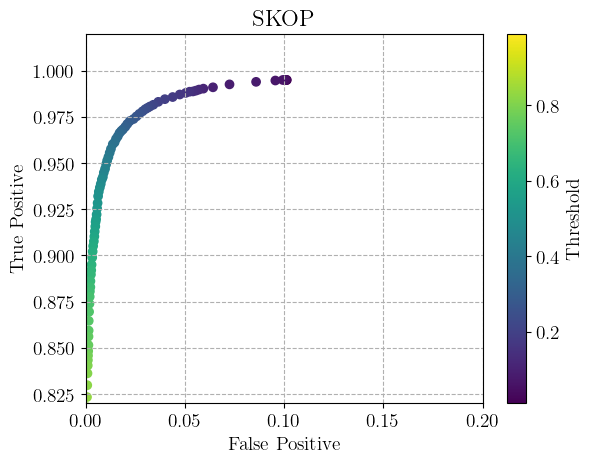

############################################################
Doing SLy
File shape :  (196264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLy.joblib
Model score :  0.949727407055147
Predicting probabilities...
Testing time (s) :  3.667525759898126


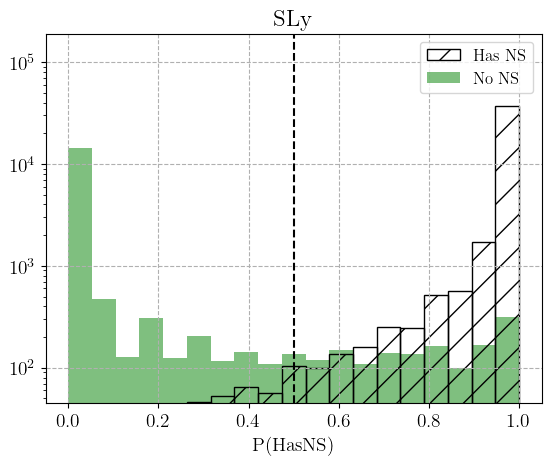

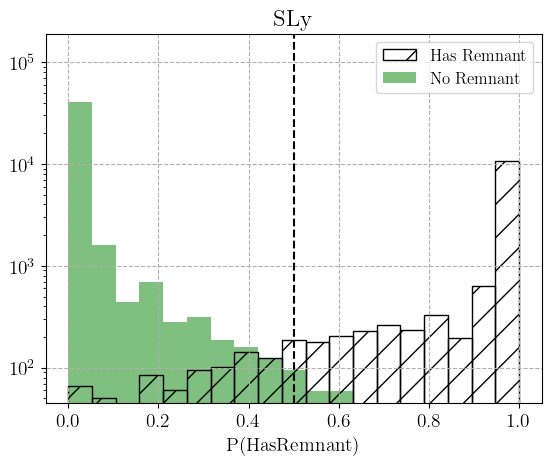

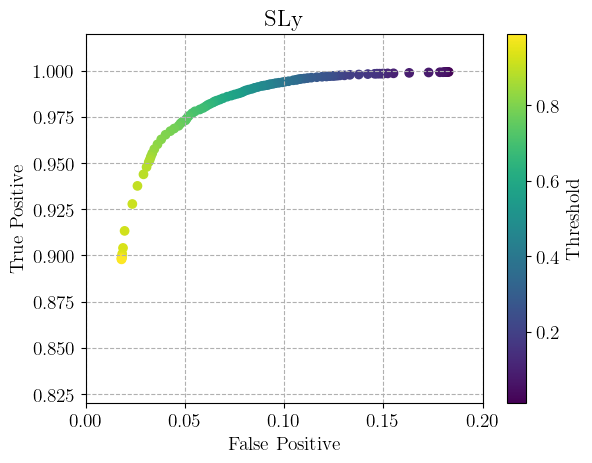

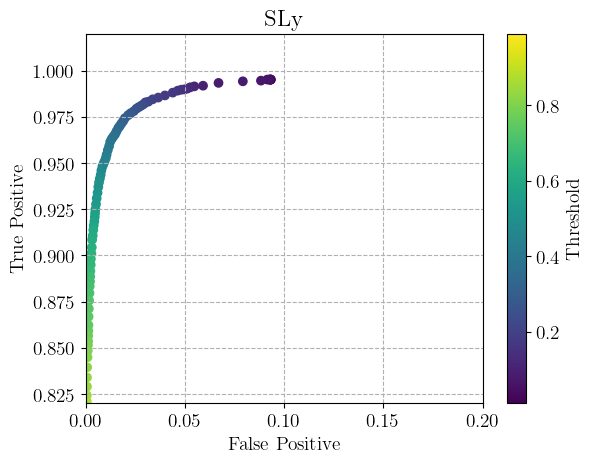

############################################################
Doing SLY2
File shape :  (196264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLY2.joblib
Model score :  0.94974439103925
Predicting probabilities...
Testing time (s) :  3.358657928183675


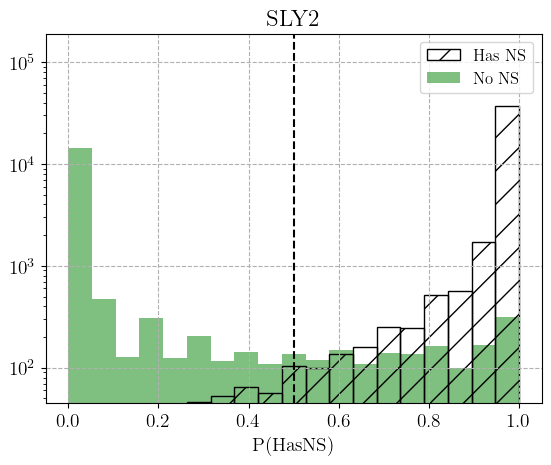

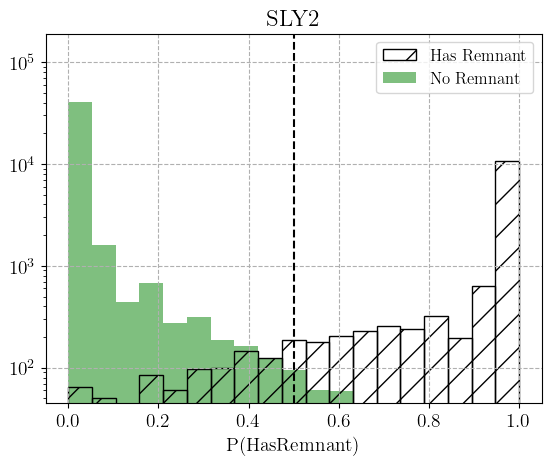

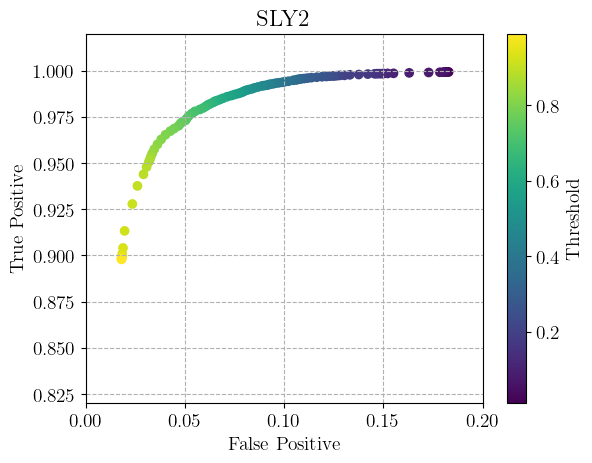

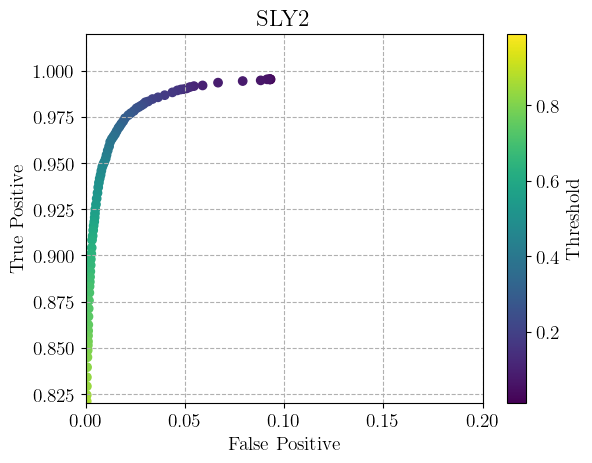

############################################################
Doing SLY9
File shape :  (198883, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198883
Nº of events for training:  139219
Nº of events for testing:  59664
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLY9.joblib
Model score :  0.9488468758380263
Predicting probabilities...
Testing time (s) :  3.3613674780353904


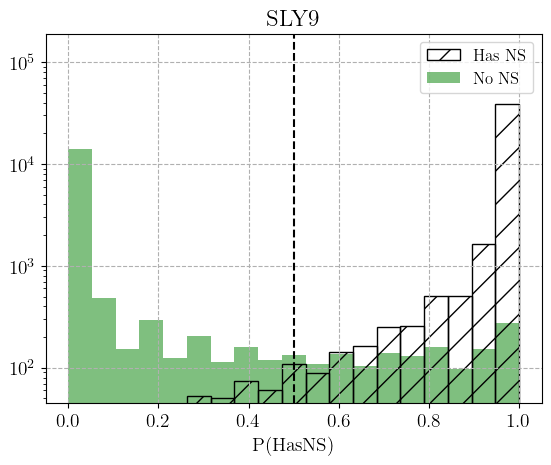

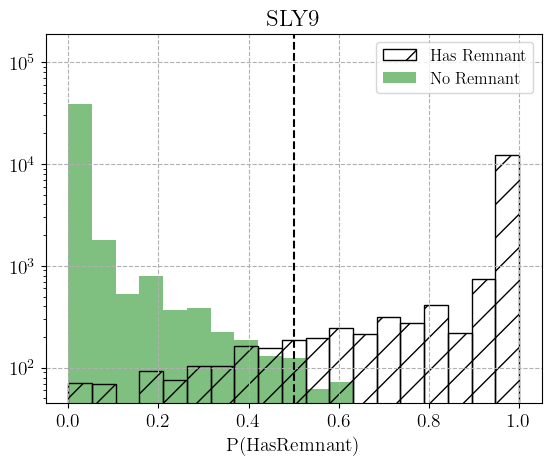

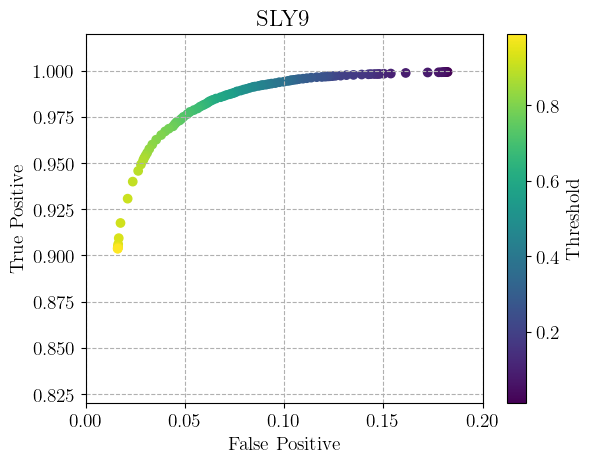

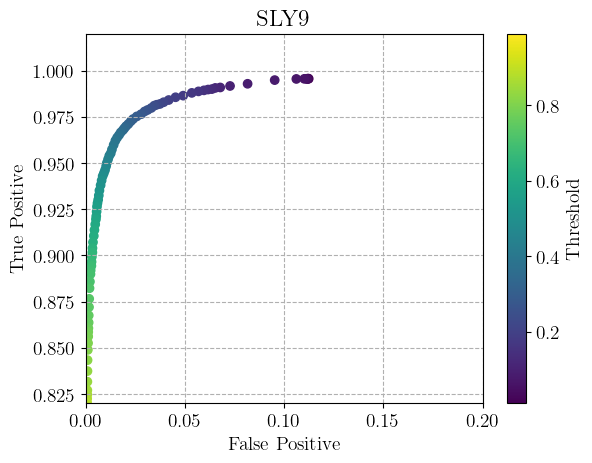

############################################################
Doing SLY230A
File shape :  (197359, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  197359
Nº of events for training:  138152
Nº of events for testing:  59207
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLY230A.joblib
Model score :  0.9502085902004831
Predicting probabilities...
Testing time (s) :  3.781613145954907


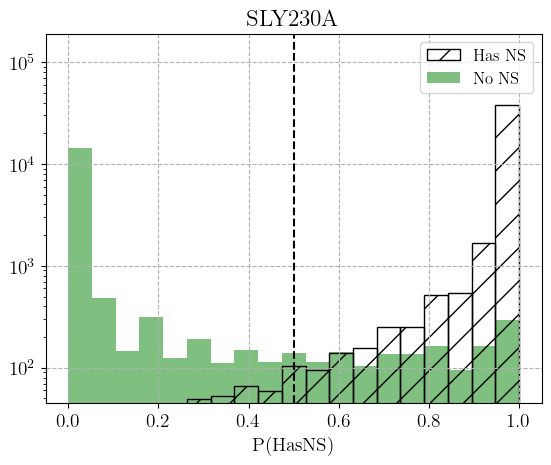

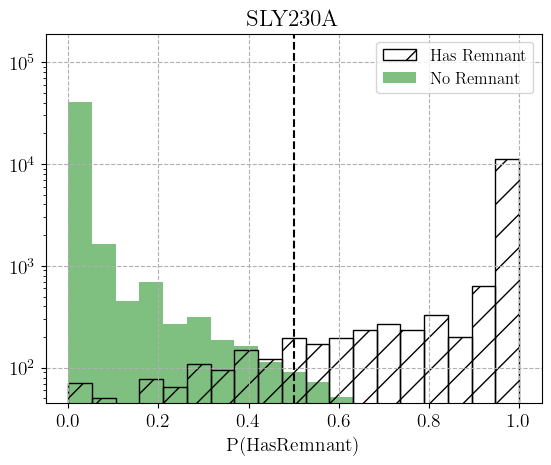

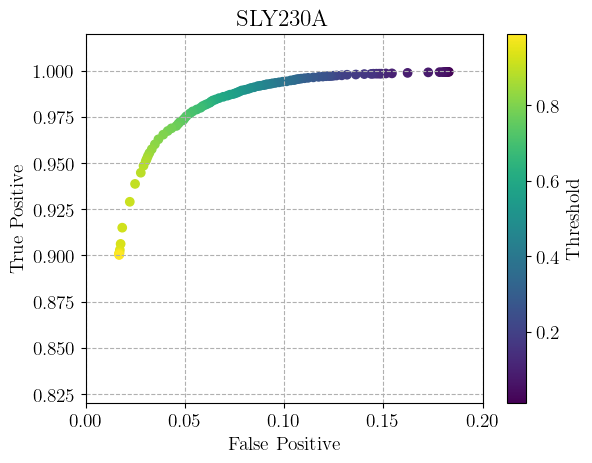

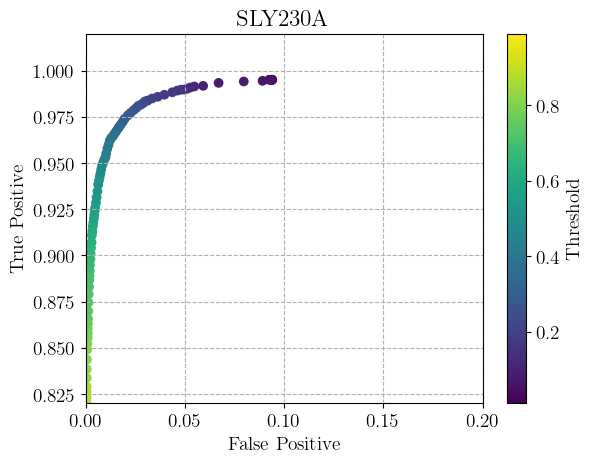

############################################################


In [39]:
for eos in EOS:
    print("Doing", eos)
    KNN = KNNclassy.ClassificationKNN()
    KNN.load_original_dataset(pathData,eos+"/EMB/original_data_"+eos+"_s300_f0d7.csv")
    KNN.loadModel("models_eos/", "knn_3cat_eos_"+eos)
    new_dic = {}
    new_dic['knn'] = KNN
    new_dic['bayes'] = BayesFactor[count]
    EOSdic[eos] = new_dic
    count = count + 1

    KNN.compute_metrics()
    

    EOSdic[eos]['score'] = KNN.metrics['score']
    params_model = KNN.model.get_params()
    EOSdic[eos]['n_neigh'] = params_model.get('n_neighbors')
    EOSdic[eos]['metric'] = params_model.get('metric')
    EOSdic[eos]['algo'] = params_model.get('algorithm')
    EOSdic[eos]['weight'] = params_model.get('weights')

    hist_NS(KNN,'figsKNN_eos/histNS/hist_NS_eos_'+eos)
    hist_REM(KNN,'figsKNN_eos/histREM/hist_REM_eos_'+eos)
    EOSdic[eos]['NS_FP'], EOSdic[eos]['NS_TP'], EOSdic[eos]['NS_thr'] = ROC_NS(KNN, thr_wanted = [],figname='figsKNN_eos/ROC_NS/ROC_NS_eos_'+eos)
    EOSdic[eos]['REM_FP'], EOSdic[eos]['REM_TP'], EOSdic[eos]['REM_thr'] = ROC_REM(KNN, thr_wanted = [],figname='figsKNN_eos/ROC_REM/ROC_REM_eos_'+eos)

    with open('ROC_CURVES_KNN/ROC_CURVES_NS/NS_ROC_'+eos+'.txt','w') as f:
        f.write('#FP \t TP \t Thr\n')
        FP_NS =  EOSdic[eos]['NS_FP']
        TP_NS =  EOSdic[eos]['NS_TP']
        thr_NS =  EOSdic[eos]['NS_thr']
        for i in range(0,len(FP_NS)):
            f.write('%f \t %f \t %f \n'%(FP_NS[i],TP_NS[i],thr_NS[i]))

    with open('ROC_CURVES_KNN/ROC_CURVES_REM/REM_ROC_'+eos+'.txt','w') as f:
        f.write('#FP \t TP \t Thr\n')
        FP_REM =  EOSdic[eos]['REM_FP']
        TP_REM =  EOSdic[eos]['REM_TP']
        thr_REM =  EOSdic[eos]['REM_thr']
        for i in range(0,len(FP_REM)):
            f.write('%f \t %f \t %f \n'%(FP_REM[i],TP_REM[i],thr_REM[i]))
            
    print('#'*60)

File shape :  (198961, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198961
Nº of events for training:  139273
Nº of events for testing:  59688
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_APR4_EPP.joblib
Model score :  0.9530558906312827
Predicting probabilities...
Testing time (s) :  3.923456029035151
File shape :  (193624, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  193624
Nº of events for training:  135537
Nº of events for testing:  58087
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_BHF_BBB2.joblib
Model score :  0.9511766832509856
Predicting probabilities...
Testing time (s) :  3.002252080477774
File shape :  (195764, 11)
************************************************************
Loading data...
Nº of features: 

Model score :  0.948128727123175
Predicting probabilities...
Testing time (s) :  1.7293822448700666
File shape :  (196264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLy.joblib
Model score :  0.949727407055147
Predicting probabilities...
Testing time (s) :  1.8592760460451245
File shape :  (196264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLY2.joblib
Model score :  0.94974439103925
Predicting probabilities...
Testing time (s) :  1.8158348286524415
File shape :  (198883, 11)
***

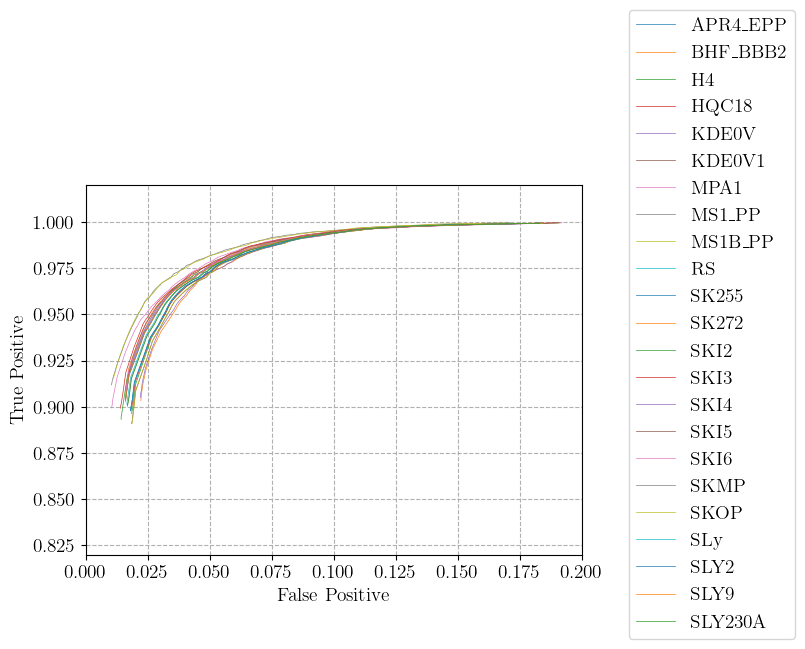

In [44]:
ROC_NS_all_EOS(EOS,"figsKNN_eos/ROC_NS/ROC_NS_all_EOS")

File shape :  (198961, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  198961
Nº of events for training:  139273
Nº of events for testing:  59688
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_APR4_EPP.joblib
Model score :  0.9530558906312827
Predicting probabilities...
Testing time (s) :  1.91325543820858
File shape :  (193624, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  193624
Nº of events for training:  135537
Nº of events for testing:  58087
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_BHF_BBB2.joblib
Model score :  0.9511766832509856
Predicting probabilities...
Testing time (s) :  1.7171337697654963
File shape :  (195764, 11)
************************************************************
Loading data...
Nº of features: 

Model score :  0.948128727123175
Predicting probabilities...
Testing time (s) :  1.687621827237308
File shape :  (196264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLy.joblib
Model score :  0.949727407055147
Predicting probabilities...
Testing time (s) :  1.7687284937128425
File shape :  (196264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  models_eos/knn_3cat_eos_SLY2.joblib
Model score :  0.94974439103925
Predicting probabilities...
Testing time (s) :  1.7555491095408797
File shape :  (198883, 11)
****

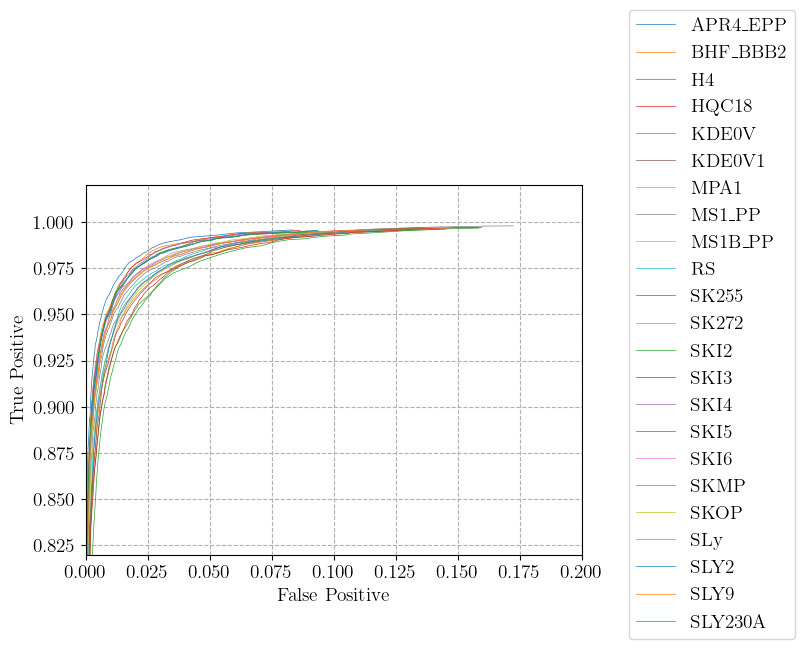

In [47]:
ROC_REM_all_EOS(EOS,"figsKNN_eos/ROC_REM/ROC_REM_all_EOS")

In [77]:
def ROC_NS_paper(dic,EOSgrey, EOScolor,figname = "ROC_NS_FINAL"):

    fig, ax1 = plt.subplots()
    plt.title("Has NS")
    for eos in EOSgrey:
        ax1.plot(dic[eos]['NS_FP'],dic[eos]['NS_TP'], c='grey', linewidth=0.3)
    colors = ['red','blue','green']
    for i,eos in enumerate(EOScolor):
        ax1.plot(dic[eos]['NS_FP'],dic[eos]['NS_TP'], c=colors[i], label=eos)

    ax1.set_xlabel("False Positive")
    ax1.set_ylabel("True Positive")
    ax1.grid(ls='--')
    ax1.set_ylim([0.925,1.01])
    ax1.set_xlim([0,0.2])
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.set_yticks(np.linspace(0.85,1,8))

    plt.rcParams["font.size"]=9
    left, bottom, width, height = [0.45, 0.2, 0.4, 0.5]
    ax2 = fig.add_axes([left, bottom, width, height])
    for eos in EOSgrey:
        ax2.plot(dic[eos]['NS_FP'],dic[eos]['NS_TP'], c='grey', linewidth=0.3)
    for i,eos in enumerate(EOScolor):
        ax2.plot(dic[eos]['NS_FP'],dic[eos]['NS_TP'], c=colors[i], label=eos)

    ax2.grid(ls='--')
    ax2.set_ylim([0.925,1.02])
    ax2.set_xlim([0.01,0.04])
    ax2.set_yticks(np.linspace(0.85,1,8))

    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    return

def ROC_REM_paper(dic,EOSgrey, EOScolor,figname = "ROC_REM_FINAL"):

    fig, ax1 = plt.subplots()
    plt.title("Has Remnant")
    for eos in EOSgrey:
        ax1.plot(dic[eos]['REM_FP'],dic[eos]['REM_TP'], c='grey', linewidth=0.3)
    colors = ['red','blue','green']
    for i,eos in enumerate(EOScolor):
        ax1.plot(dic[eos]['REM_FP'],dic[eos]['REM_TP'], c=colors[i], label=eos)

    ax1.set_xlabel("False Positive")
    ax1.set_ylabel("True Positive")
    ax1.grid(ls='--')
    ax1.set_ylim([0.925,1.02])
    ax1.set_xlim([0,0.2])
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.set_yticks(np.linspace(0.825,1,8))

    plt.rcParams["font.size"]=9
    left, bottom, width, height = [0.45, 0.2, 0.4, 0.5]
    ax2 = fig.add_axes([left, bottom, width, height])
    for eos in EOSgrey:
        ax2.plot(dic[eos]['REM_FP'],dic[eos]['REM_TP'], c='grey', linewidth=0.3)
    for i,eos in enumerate(EOScolor):
        ax2.plot(dic[eos]['REM_FP'],dic[eos]['REM_TP'], c=colors[i], label=eos)

    ax2.grid(ls='--')
    ax2.set_ylim([0.9,1.02])
    ax2.set_xlim([0,0.04])
    ax2.set_yticks(np.linspace(0.825,1,8))

    plt.savefig(figname+'.png',dpi=200,bbox_inches='tight')
    return

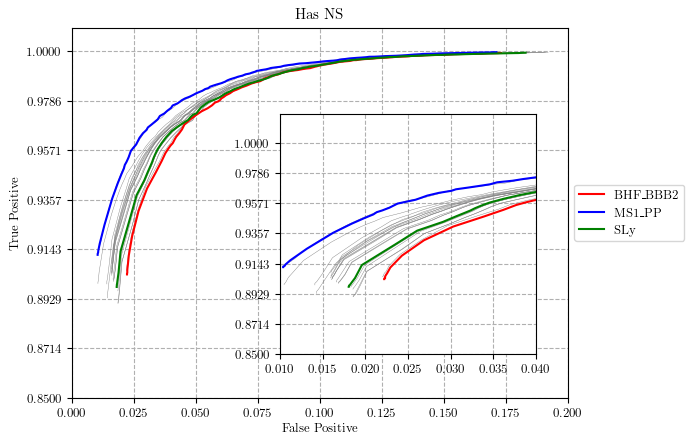

In [78]:
ROC_NS_paper(EOSdic,EOSgrey, EOScolor,"figsKNN_eos/ROC_NS/ROC_NS_FINAL")

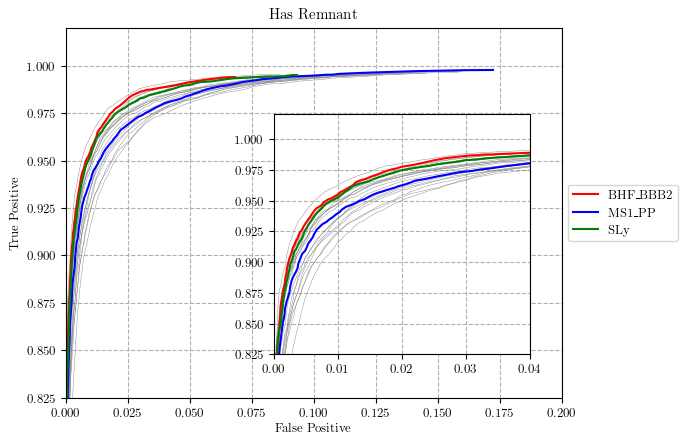

In [79]:
ROC_REM_paper(EOSdic,EOSgrey, EOScolor,"figsKNN_eos/ROC_REM/ROC_REM_FINAL")

In [81]:
print('*'*80)
print('# EOS    SCORE    N_neigh    METRIC    ALGO    WEIGHTS    BayesFactor \n')
print('-'*80)
for eos in EOS:

    print('%s    %.4f    %d    %s    %s    %s   %.3f \n'%(eos,EOSdic[eos]['score'],EOSdic[eos]['n_neigh'],EOSdic[eos]['metric'],EOSdic[eos]['algo'],EOSdic[eos]['weight'],EOSdic[eos]['bayes']))

print('*'*80)

********************************************************************************
# EOS    SCORE    N_neigh    METRIC    ALGO    WEIGHTS    BayesFactor 

--------------------------------------------------------------------------------
APR4_EPP    0.9531    10    manhattan    ball_tree    distance   1.526 

BHF_BBB2    0.9512    8    manhattan    ball_tree    distance   1.555 

H4    0.9411    10    manhattan    ball_tree    distance   0.056 

HQC18    0.9504    10    manhattan    ball_tree    distance   1.422 

KDE0V    0.9506    8    manhattan    ball_tree    distance   1.177 

KDE0V1    0.9495    10    manhattan    ball_tree    distance   1.283 

MPA1    0.9510    14    manhattan    ball_tree    distance   0.276 

MS1_PP    0.9481    12    manhattan    ball_tree    distance   0.001 

MS1B_PP    0.9474    11    manhattan    ball_tree    distance   0.009 

RS    0.9458    10    manhattan    ball_tree    distance   0.176 

SK255    0.9460    10    manhattan    ball_tree    distance   0.1

In [83]:
with open('KNN_OPT_PARAM_ALL_EOS.txt','w') as f:

    f.write('# EOS \t SCORE \t N_neigh \t METRIC \t ALGO \t WEIGHTS \t BayesFactor \n')

    for eos in EOS:

        f.write('%s \t %f \t %d \t %s \t %s \t %s \t %f \n'%(eos,EOSdic[eos]['score'],EOSdic[eos]['n_neigh'],EOSdic[eos]['metric'],EOSdic[eos]['algo'],EOSdic[eos]['weight'],EOSdic[eos]['bayes']))

In [86]:
n_weigh = []
weigh = []
for eos in EOS:
    n_weigh.append(EOSdic[eos]['n_neigh']*EOSdic[eos]['bayes'])
    weigh.append(EOSdic[eos]['bayes'])
    
den = np.array(n_weigh)
num = np.array(weigh)

n_av = np.sum(den)/np.sum(num)

print('Weighted average of number of neighbors: ',n_av)
print('Rounded to integer: ', round(n_av))

Weighted average of number of neighbors:  9.69461866047232
Rounded to integer:  10
